## Penjelasan Dataset yang digunakan

### **Import Library dan Load Data**

Untuk memulai, kita perlu mengimpor library yang akan digunakan, seperti `pandas` untuk manipulasi data. Setelah itu, kita akan memuat dataset Anda. Pastikan Anda mengganti `'your_dataset.csv'` dengan path atau nama file dataset Anda yang sebenarnya.

### Penjelasan Dataset

#### 1. Kasus yang Diambil
Dataset ini tampaknya digunakan untuk menganalisis **postingan Twitter terkait kesehatan mental**. Tujuannya bisa beragam, seperti deteksi dini masalah kesehatan mental melalui pola teks, analisis sentimen, atau identifikasi topik-topik dominan dalam diskusi kesehatan mental di media sosial.

#### 2. Penjelasan Setiap Kolom
Berikut adalah detail mengenai setiap kolom yang ada dalam dataset Anda:
-   **`Unnamed: 0`**: Kolom indeks yang tidak memiliki informasi spesifik selain sebagai penanda urutan. Biasanya kolom ini dapat diabaikan atau dihapus.
-   **`post_id`**: ID unik untuk setiap postingan (tweet).
-   **`post_created`**: Tanggal dan waktu pembuatan postingan.
-   **`post_text`**: Isi atau teks dari postingan Twitter. Ini adalah kolom utama yang akan digunakan untuk analisis teks.
-   **`user_id`**: ID unik dari pengguna Twitter yang membuat postingan.
-   **`followers`**: Jumlah pengikut (follower) dari pengguna yang membuat postingan.
-   **`friends`**: Jumlah pengguna yang diikuti (following) oleh pengguna yang membuat postingan.
-   **`favourites`**: Jumlah postingan yang disukai (favorited) oleh pengguna.
-   **`statuses`**: Total jumlah postingan (tweet) yang dibuat oleh pengguna.
-   **`retweets`**: Jumlah retweet yang diterima oleh postingan tersebut.
-   **`label`**: Ini adalah kolom target yang kemungkinan menunjukkan kategori terkait kesehatan mental (misalnya, `0` untuk tidak ada indikasi/negatif, `1` untuk ada indikasi/positif/netral tergantung pada definisi kasusnya).

In [ ]:
from google.colab import files

# Ini akan membuka dialog upload. Pilih file CSV Anda dari komputer Anda.
uploaded = files.upload()

# Setelah diunggah, Anda bisa melihat nama file yang terunggah
for fn in uploaded.keys():
  print('File "{name}" berhasil diunggah.'.format(name=fn))

Saving Mental-Health-Twitter.csv to Mental-Health-Twitter (3).csv
File "Mental-Health-Twitter (3).csv" berhasil diunggah.


In [ ]:
import pandas as pd

# Memuat dataset yang telah Anda sediakan
df = pd.read_csv('/content/Mental-Health-Twitter.csv')

# Menampilkan 5 baris pertama data untuk verifikasi
display(df.head())

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
print('--- Data Understanding ---')

# 1. Jumlah baris data
num_rows = df.shape[0]
print(f'Jumlah baris data: {num_rows}')

# 2. Panjang rata-rata setiap baris (khususnya kolom 'post_text')
# Mengasumsikan 'panjang rata-rata setiap baris' merujuk pada panjang teks dalam kolom 'post_text'
df['text_length'] = df['post_text'].apply(len)
average_text_length = df['text_length'].mean()
print(f'Panjang rata-rata teks postingan: {average_text_length:.2f} karakter')

# 3. Cek data duplikasi
duplicated_rows = df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicated_rows}')

# 4. Cek data kosong
missing_data = df.isnull().sum()
print('\nJumlah data kosong per kolom:')
print(missing_data[missing_data > 0])

--- Data Understanding ---
Jumlah baris data: 20000
Panjang rata-rata teks postingan: 82.46 karakter
Jumlah data duplikat: 0

Jumlah data kosong per kolom:
Series([], dtype: int64)


## Data Understanding

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


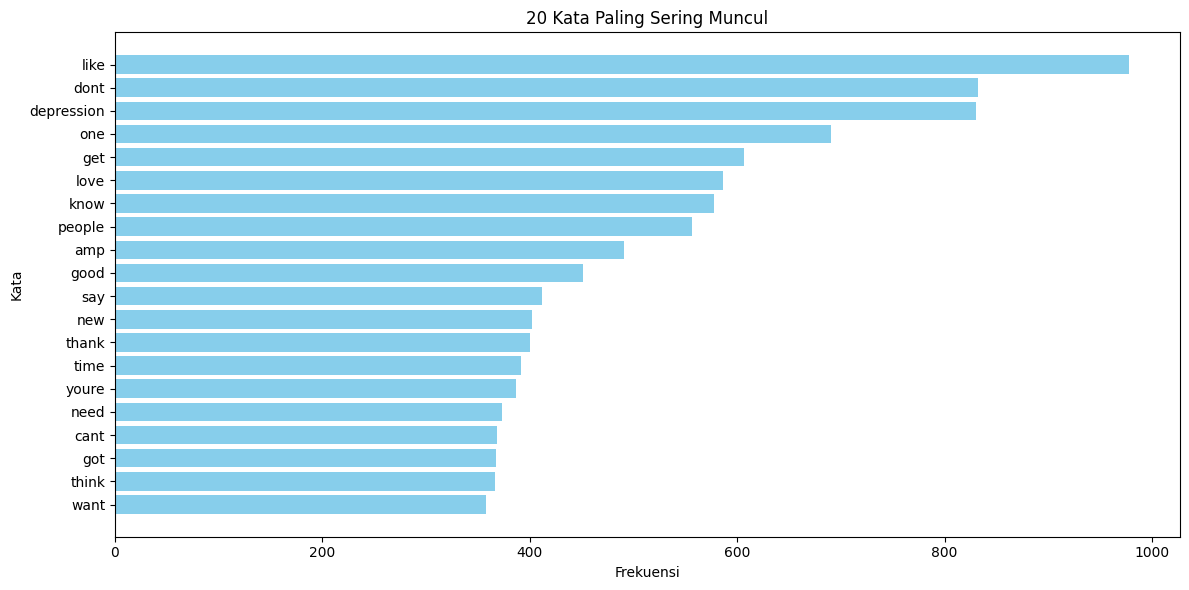

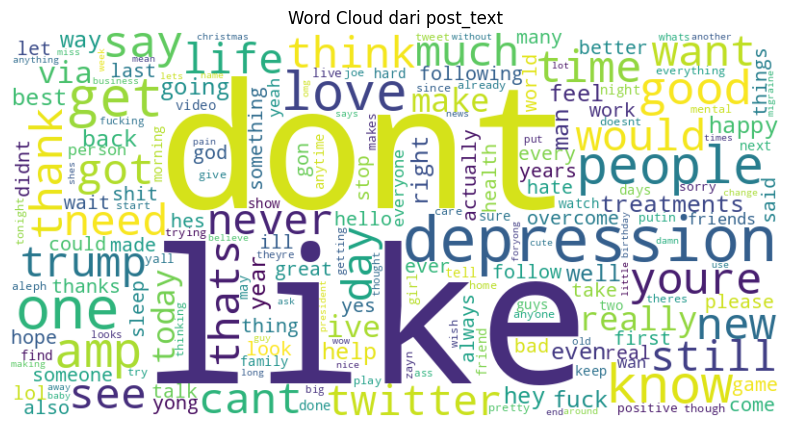

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Unduh resource NLTK jika belum ada
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.word_tokenize('test')
except LookupError:
    nltk.download('punkt')
# Tambahkan unduhan untuk 'punkt_tab' sesuai saran error
try:
    # This line might not be strictly necessary if 'punkt' covers it,
    # but adding it as per the error message's suggestion.
    nltk.data.find('tokenizers/punkt_tab/english.pickle') # Check if it exists
except LookupError:
    nltk.download('punkt_tab')

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower() # Ubah ke huruf kecil
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Hapus URL
    text = re.sub(r'@[\w]*', '', text) # Hapus sebutan (@username)
    text = re.sub(r'#[\w]*', '', text) # Hapus hashtag (#hashtag)
    text = re.sub(r'[^a-z ]', '', text) # Hapus karakter non-alfabet
    text = text.strip() # Hapus spasi di awal/akhir
    return text

# Terapkan pembersihan teks
df['cleaned_text'] = df['post_text'].apply(clean_text)

# Gabungkan semua teks bersih menjadi satu string
all_words = ' '.join(df['cleaned_text'])

# Tokenisasi dan hapus stopword
stop_words = set(stopwords.words('english'))
words = nltk.word_tokenize(all_words)
words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]

# Hitung frekuensi kata
word_counts = Counter(words)

# Tampilkan 20 kata yang paling sering muncul (Bar Chart)
most_common_words = word_counts.most_common(20)
words_freq = [word[0] for word in most_common_words]
occurrences = [word[1] for word in most_common_words]

plt.figure(figsize=(12, 6))
plt.barh(words_freq[::-1], occurrences[::-1], color='skyblue')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('20 Kata Paling Sering Muncul')
plt.tight_layout()
plt.show()

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari post_text')
plt.show()

## Data Text Processing

Kita akan melanjutkan dengan serangkaian langkah pemrosesan teks untuk membersihkan dan mempersiapkan kolom `post_text` untuk analisis lebih lanjut. Ini termasuk:
1.  **Tokenisasi**: Memecah teks menjadi unit-unit kata.
2.  **Lemmatisasi**: Mengubah kata menjadi bentuk dasarnya (misalnya, 'running' menjadi 'run').
3.  **Stopword Removal**: Menghapus kata-kata umum yang tidak memberikan banyak makna (misalnya, 'the', 'is', 'a').
4.  **Text Normalization**: Mengubah teks menjadi format standar (huruf kecil, menghapus karakter non-alfabet).
5.  **Text Vectorization**: Mengubah teks menjadi representasi numerik (misalnya, menggunakan TF-IDF).

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Unduh resource NLTK yang diperlukan jika belum ada
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.word_tokenize('test')
except LookupError:
    nltk.download('punkt')
try:
    nltk.WordNetLemmatizer()
except LookupError:
    nltk.download('wordnet') # This is the missing download!
try:
    nltk.data.find('corpora/wordnet.zip') # Check if wordnet is available as a zip
except LookupError:
    nltk.download('wordnet') # Fallback to download wordnet if not found
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi pembersihan dan pra-pemrosesan teks yang lebih komprehensif
def preprocess_text(text):
    text = str(text).lower() # Ubah ke huruf kecil dan pastikan string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Hapus URL
    text = re.sub(r'@\w+', '', text) # Hapus sebutan (@username)
    text = re.sub(r'#\w+', '', text) # Hapus hashtag (#hashtag)
    text = re.sub(r'[^a-z ]', '', text) # Hapus karakter non-alfabet
    text = text.strip() # Hapus spasi di awal/akhir

    # Tokenisasi
    tokens = nltk.word_tokenize(text)

    # Penghapusan stopword dan lemmatisasi
    stop_words = set(stopwords.words('english'))
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]

    return ' '.join(processed_tokens)

# Terapkan fungsi pra-pemrosesan ke kolom 'post_text'
df['processed_text'] = df['post_text'].apply(preprocess_text)

display(df[['post_text', 'processed_text']].head())

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,post_text,processed_text
0,It's just over 2 years since I was diagnosed w...,year since diagnosed today taking moment refle...
1,"It's Sunday, I need a break, so I'm planning t...",sunday need break planning spend little time p...
2,Awake but tired. I need to sleep but my brain ...,awake tired need sleep brain idea
3,RT @SewHQ: #Retro bears make perfect gifts and...,bear make perfect gift great beginner get stit...
4,It’s hard to say whether packing lists are mak...,hard say whether packing list making life easi...


### Text Vectorization (TF-IDF)

Setelah teks dibersihkan dan diproses, kita akan mengubahnya menjadi representasi numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency). Ini adalah teknik umum untuk mencerminkan pentingnya suatu kata dalam dokumen relatif terhadap korpus.

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur untuk kinerja

# Terapkan TF-IDF ke kolom 'processed_text'
x_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

print(f"Bentuk matriks TF-IDF: {x_tfidf.shape}")
print(f"Contoh fitur (kata) yang diekstraksi: {tfidf_vectorizer.get_feature_names_out()[:20]}")

Bentuk matriks TF-IDF: (20000, 5000)
Contoh fitur (kata) yang diekstraksi: ['aaron' 'ab' 'abandoned' 'abby' 'abc' 'ability' 'able' 'absolute'
 'absolutely' 'abt' 'abuse' 'abused' 'abusing' 'academy' 'accent' 'accept'
 'acceptance' 'accepted' 'accepts' 'access']


## Data Modeling

Pada tahap ini, kita akan memilih dan mengimplementasikan model machine learning untuk memprediksi atau mengklasifikasikan data. Pilihan model sangat bergantung pada tujuan analisis dan karakteristik data. Beberapa model yang umum digunakan untuk masalah klasifikasi teks meliputi:

*   **Naive Bayes**: Sederhana, cepat, dan sering kali efektif untuk klasifikasi teks.
*   **Support Vector Machine (SVM)**: Kuat dalam ruang berdimensi tinggi seperti fitur teks, sering memberikan kinerja yang baik.
*   **Logistic Regression**: Model linier yang baik untuk klasifikasi biner dan dapat memberikan probabilitas kelas.
*   **Random Forest / Gradient Boosting (misalnya XGBoost, LightGBM)**: Ensemble learning yang dapat menangani data kompleks dan memberikan akurasi tinggi.
*   **Deep Learning (misalnya RNN, LSTM, Transformer)**: Untuk kasus yang lebih kompleks dan data yang sangat besar, model ini dapat menangkap pola yang lebih rumit.

### Penjelasan Model yang Dipilih

*(Di sini Anda dapat menjelaskan model yang akan Anda pilih, mengapa model tersebut cocok untuk dataset ini, dan bagaimana cara kerjanya secara singkat.)*

## Data Modeling

## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya


--- Kata Kunci Teratas per Topik (LDA) ---
Topik 1:
thank twitter like say get hello paytforluckysun good following miss
Topik 2:
love yes year like got going day cute god cant
Topik 3:
dont know want like one friend best video need well
Topik 4:
thanks talk follow hey business hate think girl guy positive
Topik 5:
depression treatment overcome help foryong yong migraine headache fuck one


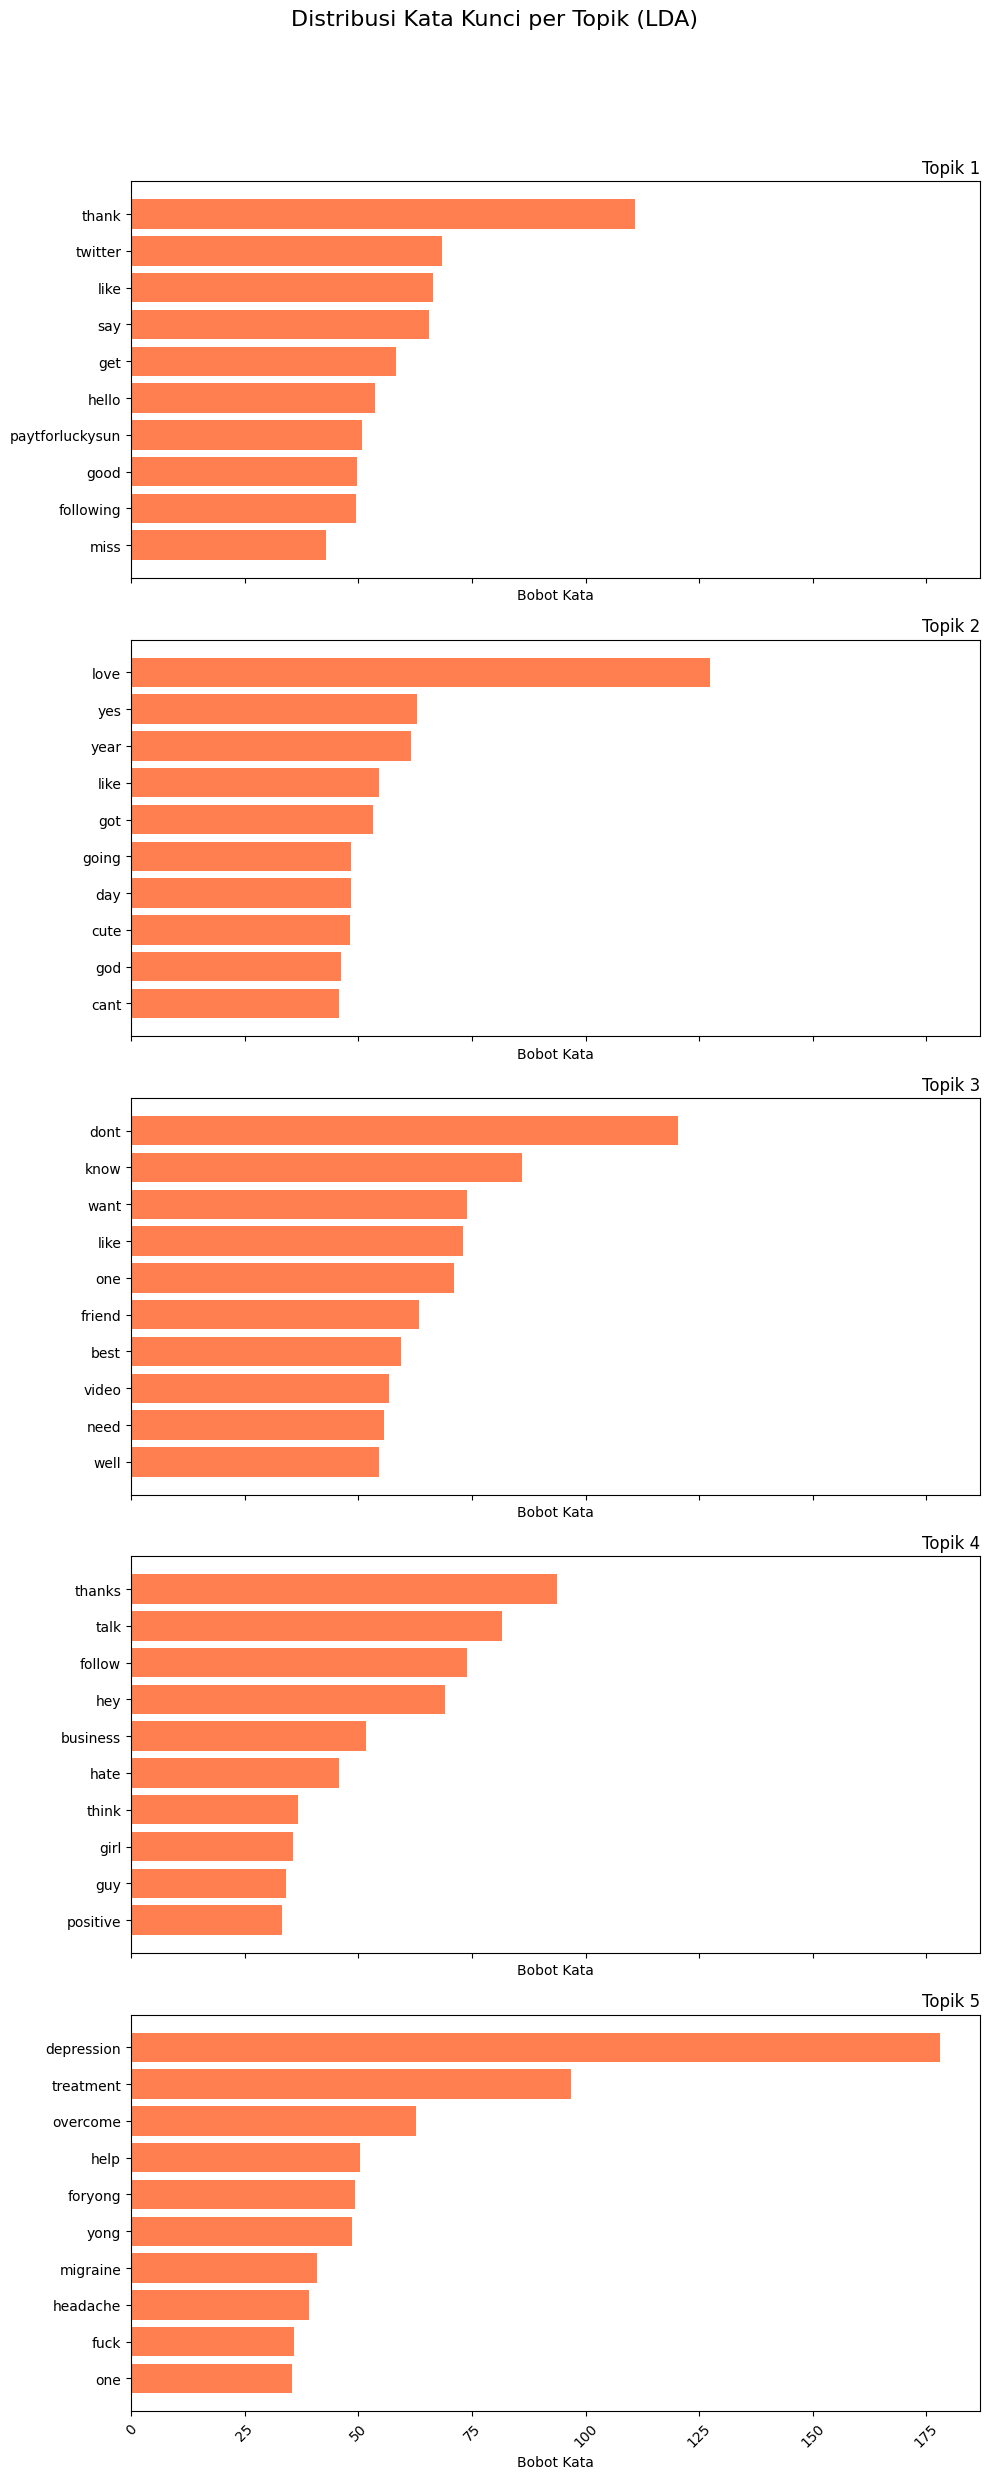

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Memilih jumlah topik (misalnya, 5 topik)
num_topics = 5

# Inisialisasi dan latih model LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(x_tfidf)

# Dapatkan nama fitur (kata-kata) dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Fungsi untuk menampilkan kata-kata kunci per topik
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_): # Diperbaiki: components__ menjadi components_
        print(f"Topik {topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Tampilkan 10 kata kunci teratas untuk setiap topik
no_top_words = 10
print("\n--- Kata Kunci Teratas per Topik (LDA) ---")
display_topics(lda_model, feature_names, no_top_words)

# Visualisasi Kata Kunci Teratas per Topik (Bar Chart)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(num_topics, 1, figsize=(10, 5 * num_topics), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda_model.components_): # Diperbaiki: components__ menjadi components_
    top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features[::-1], weights[::-1], color='coral')
    ax.set_title(f'Topik {topic_idx + 1}', loc='right')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Bobot Kata')

plt.suptitle('Distribusi Kata Kunci per Topik (LDA)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

### Implementasi PCA dan t-SNE

Kita akan menggunakan PCA (Principal Component Analysis) dan t-SNE (t-Distributed Stochastic Neighbor Embedding) untuk mereduksi dimensi dari matriks TF-IDF (`x_tfidf`). Reduksi dimensi ini sangat berguna untuk visualisasi dan dapat membantu mengungkapkan struktur tersembunyi dalam data.

Bentuk data setelah PCA: (5000, 50)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Bentuk data setelah t-SNE: (5000, 2)


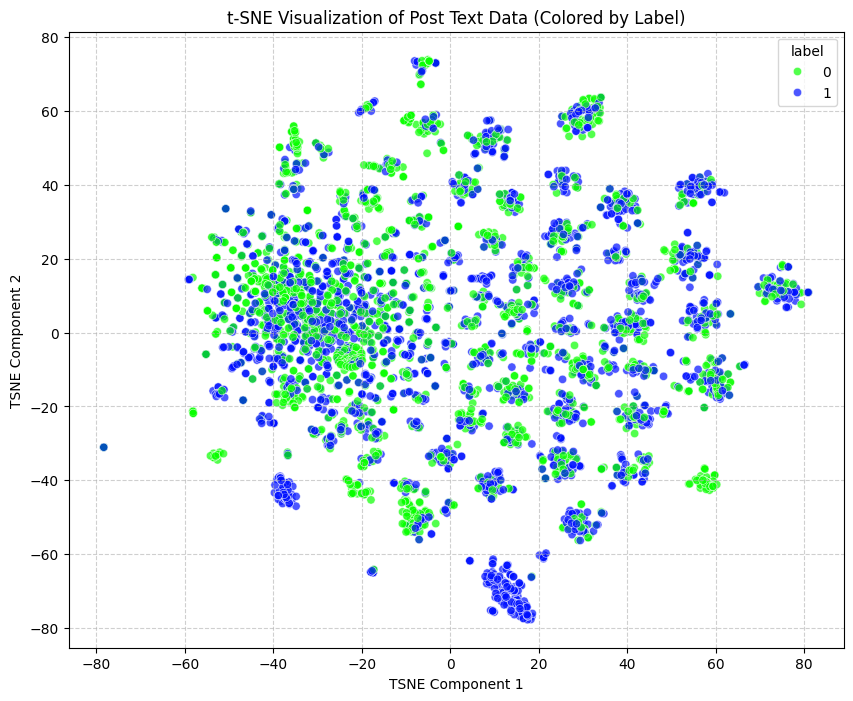

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mengambil sejumlah kecil data untuk t-SNE agar lebih cepat
# t-SNE bisa sangat lambat pada dataset besar
subset_size = 5000
if x_tfidf.shape[0] > subset_size:
    # Pilih sampel acak dari data untuk t-SNE
    np.random.seed(42) # for reproducibility
    random_indices = np.random.choice(x_tfidf.shape[0], subset_size, replace=False)
    x_tfidf_subset = x_tfidf[random_indices]
    df_subset = df.iloc[random_indices].reset_index(drop=True)
else:
    x_tfidf_subset = x_tfidf
    df_subset = df.copy().reset_index(drop=True)


# --- PCA --- (untuk perbandingan atau pre-reduction untuk t-SNE)
# Reduksi dimensi dengan PCA menjadi 50 komponen
pca = PCA(n_components=50, random_state=42)
x_pca = pca.fit_transform(x_tfidf_subset)
print(f"Bentuk data setelah PCA: {x_pca.shape}")

# --- t-SNE --- (untuk visualisasi 2D)
# Reduksi dimensi dengan t-SNE ke 2 komponen untuk visualisasi
# Seringkali t-SNE bekerja lebih baik setelah PCA
t_sne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
x_tsne = t_sne.fit_transform(x_pca) # Menggunakan output PCA sebagai input t-SNE

print(f"Bentuk data setelah t-SNE: {x_tsne.shape}")

# Buat DataFrame untuk visualisasi
tsne_df = pd.DataFrame(data=x_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2'])
tsne_df['label'] = df_subset['label'] # Tambahkan kolom label jika ada

# Visualisasi hasil t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE_Component_1', y='TSNE_Component_2', hue='label',
    palette=sns.color_palette('hsv', len(tsne_df['label'].unique())),
    data=tsne_df, legend='full', alpha=0.7
)
plt.title('t-SNE Visualization of Post Text Data (Colored by Label)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Training dan Evaluasi Model Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan data menjadi fitur (X) dan target (y)
X = x_tfidf
y = df['label']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

# Inisialisasi dan latih model Multinomial Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model Naive Bayes: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Ukuran X_train: (16000, 5000)
Ukuran X_test: (4000, 5000)
Ukuran y_train: (16000,)
Ukuran y_test: (4000,)

Akurasi Model Naive Bayes: 0.7452

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1981
           1       0.74      0.75      0.75      2019

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000

